## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 8s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/var/folders/dt/7fp4ny0n7fl2v6gvg1_svr8r0000gn/T/ipykernel_20794/4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50


2023-10-05 03:11:17.883249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - ETA: 0s - loss: 4.7636 - accuracy: 0.3438 

2023-10-05 03:11:35.700066: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 29s 16s/step - loss: 4.7636 - accuracy: 0.3438 - val_loss: 15.3496 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 24s 17s/step - loss: 8.9273 - accuracy: 0.4062 - val_loss: 8.7741 - val_accuracy: 0.1724
Epoch 3/50
2/2 [==============================] - 24s 18s/step - loss: 4.3065 - accuracy: 0.3750 - val_loss: 1.1456 - val_accuracy: 0.5345
Epoch 4/50
2/2 [==============================] - 25s 18s/step - loss: 2.3151 - accuracy: 0.3906 - val_loss: 2.3665 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 27s 20s/step - loss: 2.0429 - accuracy: 0.5000 - val_loss: 2.4239 - val_accuracy: 0.1724
Epoch 6/50
2/2 [==============================] - 39s 24s/step - loss: 2.0376 - accuracy: 0.3906 - val_loss: 3.3818 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 29s 20s/step - loss: 1.8052 - accuracy: 0.4375 - val_loss: 1.4278 - val_accuracy: 0.5862
Epoch 8/50
2/2 [=====================

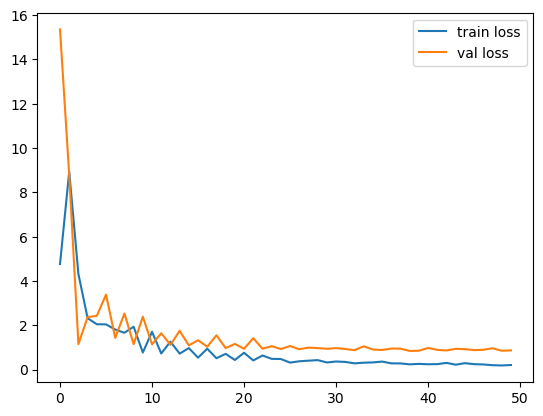

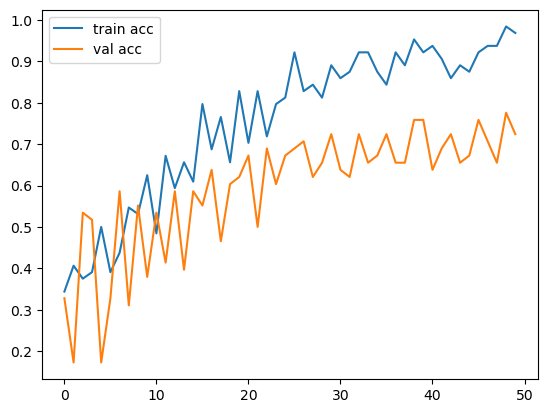

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:

y_pred = model.predict(test_set)


2023-10-05 03:40:19.765186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 12s 4s/step


In [19]:
y_pred

array([[2.66316354e-01, 3.92089605e-01, 3.41594011e-01],
       [1.58118724e-04, 9.90999401e-01, 8.84252042e-03],
       [1.38941491e-02, 5.76972306e-01, 4.09133643e-01],
       [1.81081723e-02, 5.41770935e-01, 4.40120935e-01],
       [2.97522899e-02, 3.73408556e-01, 5.96839190e-01],
       [8.64266157e-01, 8.48480985e-02, 5.08857295e-02],
       [4.67050523e-02, 5.27826488e-01, 4.25468504e-01],
       [5.11210114e-02, 3.75139564e-01, 5.73739409e-01],
       [3.39715481e-02, 8.22341323e-01, 1.43687069e-01],
       [3.41801858e-03, 3.20822150e-02, 9.64499712e-01],
       [2.04939410e-01, 7.44645238e-01, 5.04152328e-02],
       [9.86290444e-03, 8.65086317e-01, 1.25050753e-01],
       [9.74766389e-02, 6.63547575e-01, 2.38975778e-01],
       [8.58176291e-01, 8.05402920e-02, 6.12834431e-02],
       [5.79056621e-01, 1.60419233e-02, 4.04901445e-01],
       [1.45519227e-02, 8.14681411e-01, 1.70766667e-01],
       [9.37431395e-01, 3.58289331e-02, 2.67396756e-02],
       [1.39585827e-02, 2.51232

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2,
       2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

In [24]:
img_data

NameError: name 'img_data' is not defined

In [25]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [26]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [27]:
x.shape

(224, 224, 3)

In [28]:
x=x/255

In [29]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [30]:
model.predict(img_data)

1/1 [==============================] - 3s 3s/step


array([[0.01173435, 0.31169015, 0.6765755 ]], dtype=float32)

In [31]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 204ms/step


In [32]:
a==1

array([False])

In [36]:
import os
print(os.getcwd())
l = os.path.join(os.getcwd(),'uploads2')
os.makedirs(l)

/Users/anshulmehra/car_brand_project/Deep-Learning-Car-Brand


In [37]:
os.path.dirname(__file__)

NameError: name '__file__' is not defined